In [1]:
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import norm
from scipy.linalg import cholesky
from scipy.spatial import distance

# Task 1

# A.

In [2]:
x = np.linspace(-5, 5, 100)
x_pdf = norm(1, 1).pdf(x)

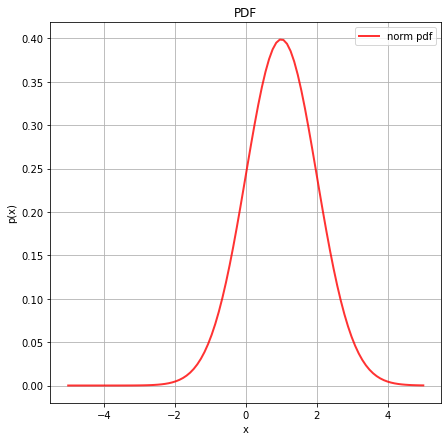

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x, x_pdf, 'r', lw=2, alpha=0.8, label='norm pdf')
ax.set_title('PDF')
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
plt.legend()
plt.grid()

# ax.set_aspect('equal')
plt.show()

# B.

In [4]:
prob_mass = norm(1, 1).cdf(0)
print(f'Proba less than 0 = {prob_mass:.4f}')

Proba less than 0 = 0.1587


# C.

In [5]:
z = 0.75
z_mean = x
z_std = np.sqrt(0.2)

# Bayes' theorem: p(x|z) = p(z|x)p(x) / p(z)

post_distr = norm(x, z_std).pdf(z) * norm(1, z_std).pdf(x) / norm(1, z_std).pdf(z)



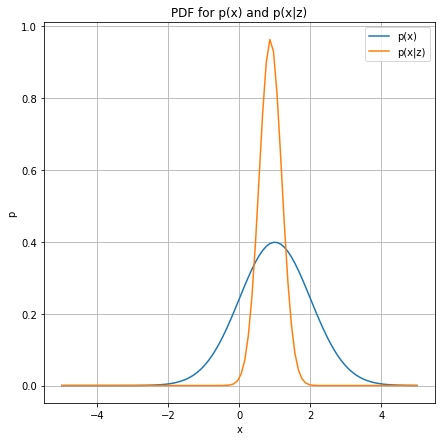

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x, x_pdf, label='p(x)')
ax.plot(x, post_distr, label='p(x|z)')

ax.set_title('PDF for p(x) and p(x|z)')
ax.set_xlabel('x')
ax.set_ylabel('p')
plt.legend()
plt.grid()
plt.show()

We can see, that variance now is less, because of that fact that we kinda add knowledge about r.v. $z$

# Task 2

# A

In [7]:
def plot2dcov(mean, cov, iso_k, n_points=100, lw=2, ax=None):
    points = np.linspace(start=0, stop=2*np.pi, num=n_points, endpoint=True)
    points_coords = np.array([np.sin(points), np.cos(points)])
    
    L = cholesky(cov, lower=True)
#     print('iso_k =', iso_k)
    y = mean + iso_k * np.dot(L, points_coords).T
    
    ax.plot(y[:, 0], y[:, 1], label=f'{iso_k} iso-contour', lw=lw)
    ax.set_aspect('equal')
    ax.legend()
#     plt.show()

In [8]:
k_vec = [1, 2, 3]
mu_vec = np.array([[0, 0], 
                   [5, 0], 
                   [2, 2]])

cov_vec = np.array([[[1, 0], 
                     [0, 2]],
                    
                    [[3, -0.4], 
                     [-0.4, 2]],
                    
                    [[9.1, 6], 
                     [6, 4]]])

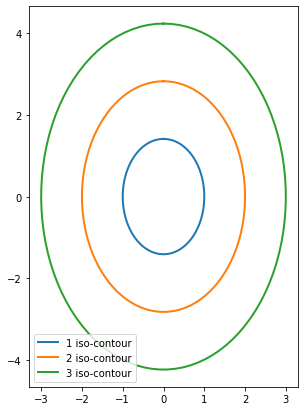

In [9]:
fig, ax = plt.subplots(figsize=(7, 7))
for k in k_vec:
    plot2dcov(mu_vec[0], cov_vec[0], k, ax=ax)

We can see that contours are centered at point (0, 0). 
It is because that fact that both $\mu_x$ and $\mu_y$ equal zero.
Moreover, ellipses are no tilted because $\mathrm{cov(x, y)=cov(y, x)=0}$.
Also ellipse is more streched along y-axis, because $\mathrm{cov(x, x) < cov(y, y)=0}$.

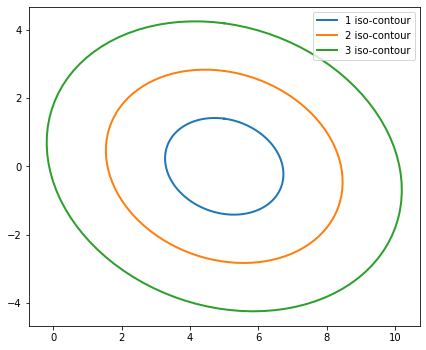

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
for k in k_vec:
    plot2dcov(mu_vec[1], cov_vec[1], k, ax=ax)

We can see that ellipses are centered at (5, 0) in this case they are tilted to the left. 
It is because that fact that both cov(x, x) and cov(y, y) are negative. 
And ellipse is a little bit streched along x-axis, because $\mathrm{cov(x, x) > cov(y, y)=0}$.

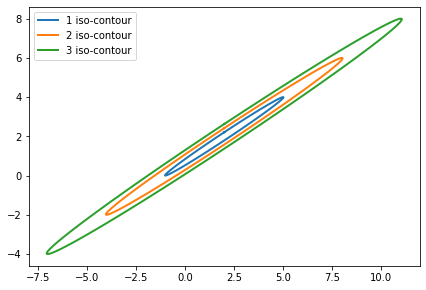

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
for k in k_vec:
    plot2dcov(mu_vec[2], cov_vec[2], k, ax=ax)

We can see that ellipses are centered at point (2, 2) and they are strongly tilted to the right. It is because that fact that both cov(x, x) and cov(y, y) are quite big and positive. And ellipse is streched along x-axis, because $\mathrm{cov(x, x) > cov(y, y)=0}$.

# B

Sample mean:
$$
\overline{x} = \frac{1}{N}\sum_{i=0}^N x_i
$$

Sample covariance:
$$
\Sigma = \frac{1}{N-1}\sum_{i=0}^N 
(x_i - \overline{x})\cdot (x_i - \overline{x})^\mathrm{T}
$$

In [12]:
def sample_mean(dat):
    # Your code below
    s_mean = np.sum(dat, axis=0) / dat.shape[0]
    
    return s_mean

In [13]:
def sample_covariance(dat):
    # Your code below
    mean = sample_mean(dat)
    s_cov = (dat - mean).T @ (dat - mean) / (dat.shape[0] - 1)
    
    return s_cov

# C

In [14]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3],
                [1.3, 3]])

In [15]:
cloud = np.random.multivariate_normal(mean, cov, 200)

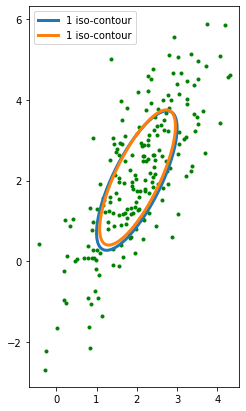

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
plot2dcov(mean, cov, iso_k=1, lw=3, ax=ax)
plot2dcov(sample_mean(cloud), sample_covariance(cloud), iso_k=1, lw=3, ax=ax)
ax.scatter(cloud[:,0], cloud[:,1], marker='.', c='g', label='Cloud')
ax.set_aspect('equal')
plt.show()

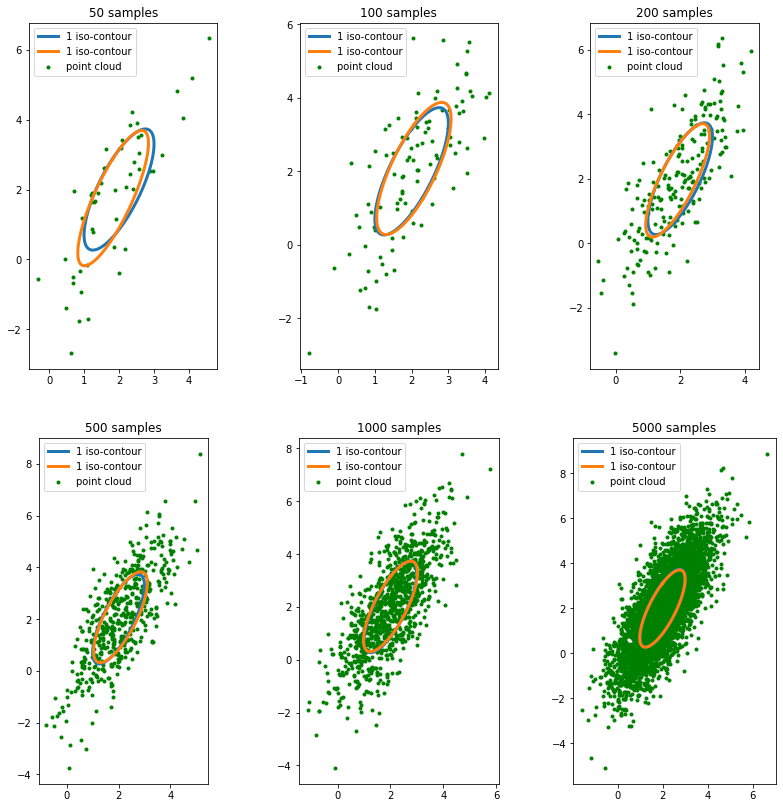

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(14, 14))
new_mean_arr = []
new_cov_arr = []
samples = [50, 100, 200, 500, 1000, 5000]

for i, n_sample in enumerate(samples):
    cloud = np.random.multivariate_normal(mean, cov, n_sample)
    new_mean_arr.append(sample_mean(cloud))
    new_cov_arr.append(sample_covariance(cloud))
    
    ax_ = ax[i//3, i%3]
    plot2dcov(mean, cov, iso_k=1, lw=3, ax=ax_)
    plot2dcov(new_mean_arr[-1], new_cov_arr[-1], iso_k=1, lw=3, ax=ax_)
    ax_.scatter(cloud[:,0], cloud[:,1], marker='.', c='g', label='point cloud')
    ax_.set_title(f'{n_sample} samples')
    ax_.legend()

In [18]:
for n_sample, m, c in zip(samples, new_mean_arr, new_cov_arr):
    mean_error = np.sqrt(np.mean((m - mean)**2))
    print(f'samples = {n_sample}')
    print(f'mean = {m}, l2_error = {mean_error:.4f}')
    print(f'cov = {c}')
    print()

samples = 50
mean = [1.83066219 1.75486528], l2_error = 0.2107
cov = [[1.02041053 1.58299725]
 [1.58299725 3.74201018]]

samples = 100
mean = [2.06147648 2.07712568], l2_error = 0.0697
cov = [[1.02410183 1.36392647]
 [1.36392647 3.23499192]]

samples = 200
mean = [1.92123154 1.94803435], l2_error = 0.0667
cov = [[0.97838665 1.37075149]
 [1.37075149 3.08488198]]

samples = 500
mean = [2.07655567 2.07187754], l2_error = 0.0743
cov = [[1.07736509 1.37208127]
 [1.37208127 3.07802948]]

samples = 1000
mean = [2.00302726 2.01841463], l2_error = 0.0132
cov = [[1.04651615 1.31245034]
 [1.31245034 2.93847313]]

samples = 5000
mean = [1.98959668 1.98013326], l2_error = 0.0159
cov = [[1.01752057 1.31381945]
 [1.31381945 2.9471822 ]]



We can see that already from approx 500 samples the results are becoming quite good. And almost there is no any difference between 500 and 5000 samples in terms of parameters of distribution.

So, we can claim that such approach in terms of approximation is good enough to understand the initial parameters of distribution. The more samples we generate the less error between them we get.

# Task 3

# A

$$
\mu_t = I\cdot\mu_{t-1} + \Delta t \cdot I u_t
$$

$$
\Sigma_t = I\Sigma_{t-1}I^\mathrm{T}+ \Sigma_{\eta_t}
$$

**Note:** in general $I$ can be any matrix, not only identity.

See .pdf file for more information:)

# B

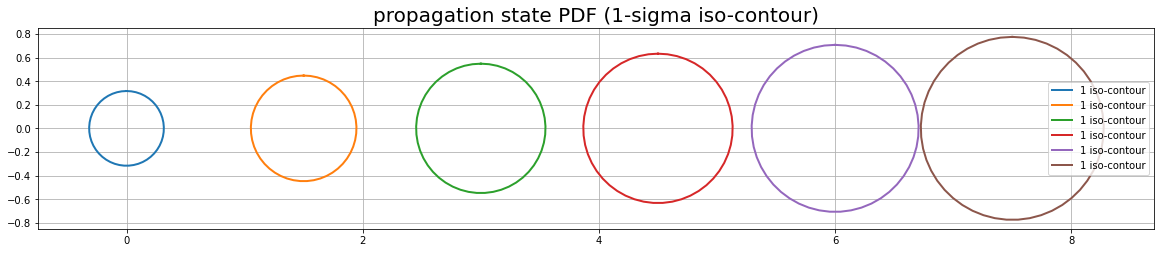

In [19]:
# initial parameters
t = 5
dt = 0.5
u = np.array([3, 0])
mu = np.array([0, 0])
I = np.eye(2, 2)
cov = 0.1 * I

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(t + 1):
    plot2dcov(mu, cov, iso_k=1, n_points=50, ax=ax)
    mu = I @ mu + dt * I @ u
    cov = I @ cov + 0.1 * I
    
plt.title('propagation state PDF (1-sigma iso-contour)', fontsize=20)
plt.legend()
plt.grid()

# C

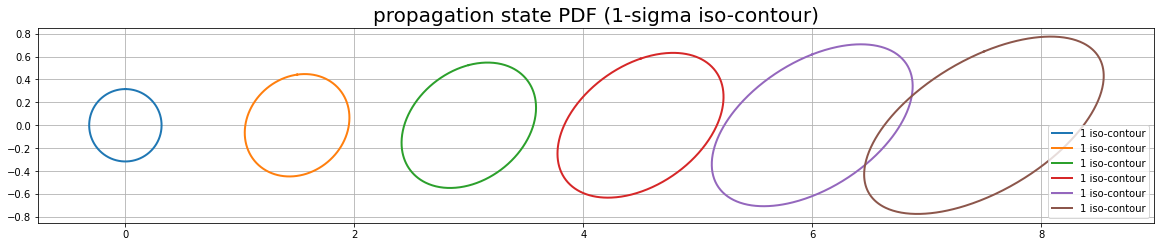

In [20]:
A = np.array([[1, 0.3], 
              [0, 1]])
# initial parameters
mu = np.array([0, 0])
cov = 0.1 * I

fig, ax = plt.subplots(figsize=(20, 20))
for i in range(t + 1):
    plot2dcov(mu, cov, iso_k=1, n_points=500, ax=ax)
    mu = A @ mu + dt * I @ u
    cov = (A @ cov) @ A.T + 0.1 * I
    
plt.title('propagation state PDF (1-sigma iso-contour)', fontsize=20)
plt.legend()
plt.grid()

# D

$$
\mu_t = I\cdot\mu_{t-1} + V(\mu_t) u_t
$$

$$
\Sigma_t = J \Sigma_{t-1} J^T + \Sigma_{\eta_t}
$$

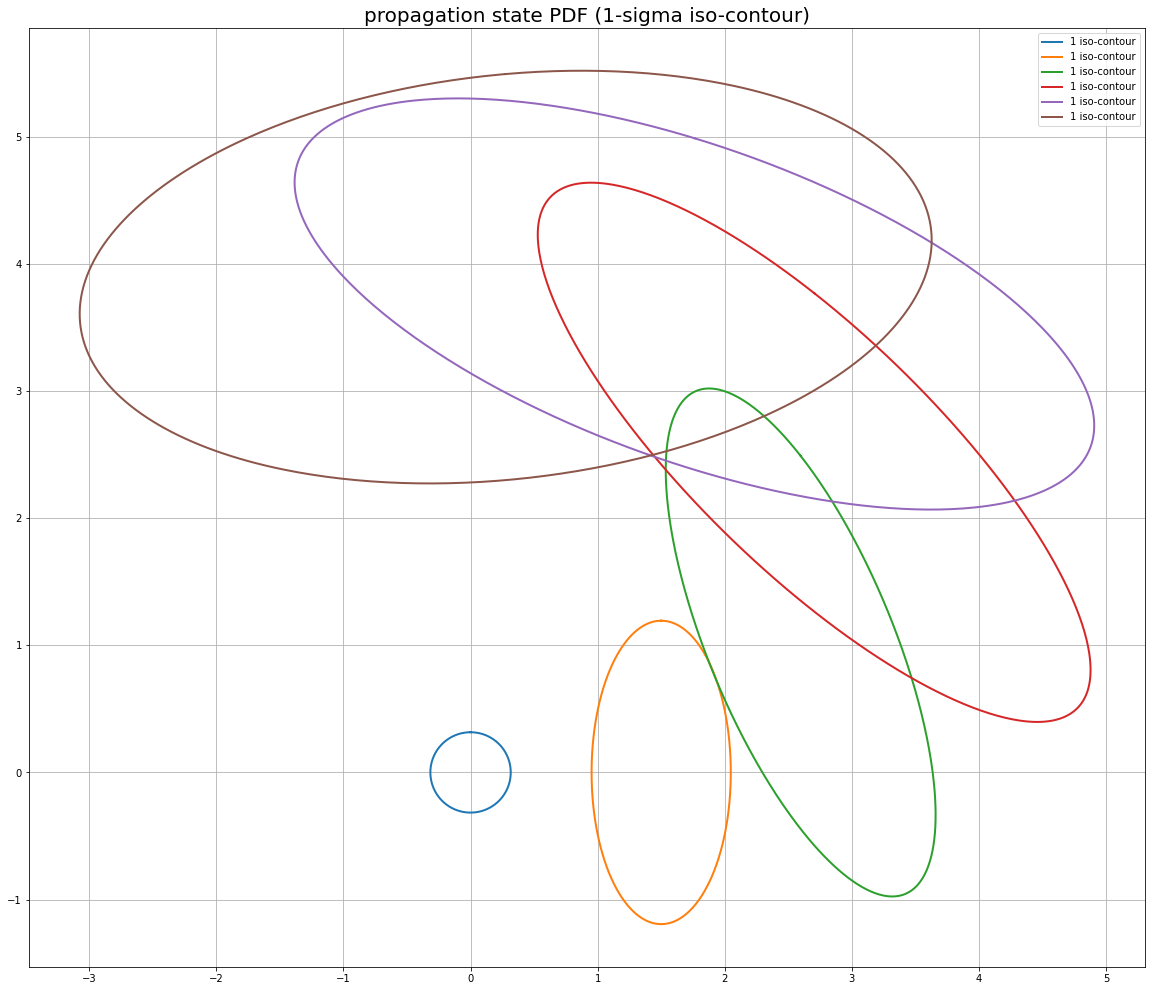

In [21]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
u = np.array([3, 1.5])
mu = np.array([0, 0, 0])

cov = np.array([[0.1, 0, 0],
                [0, 0.1, 0],
                [0, 0, 0.5]])
cov_nu = np.array([[0.2, 0, 0],
                   [0, 0.2, 0],
                   [0, 0, 0.1]])



fig, ax = plt.subplots(figsize=(20, 20))
for i in range(t + 1):
    plot2dcov(mu[:2], cov[:2, :2], iso_k=1, n_points=500, ax=ax)
    V = np.array([[dt*np.cos(mu[2]), 0], [dt*np.sin(mu[2]), 0],[0, dt]])
    Jacobian = np.array([[1, 0, -u[0]*dt*np.sin(mu[2])],[ 0, 1, u[0]*dt*np.cos(mu[2])], [0, 0, 1]])
    mu = A @ mu + V @ u
    cov = (Jacobian @ cov) @ Jacobian.T + cov_nu

plt.title('propagation state PDF (1-sigma iso-contour)', fontsize=20)
plt.legend()
plt.grid()